------------------Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataset------------------

Performing descriptive analytics, visualize data distributions, and preprocess the dataset for further analysis

In [1]:
#1) load the data set
# using sales data with discount csv file
import pandas as pd
df=pd.read_csv('sales_data_with_discounts.csv');

In [2]:
#2) Identifing numerical columns
df.columns

Index(['Date', 'Day', 'SKU', 'City', 'Volume', 'BU', 'Brand', 'Model',
       'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [3]:
numerical_cols=df.select_dtypes(include=['int64','float64']).columns
print(numerical_cols)

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')


In [4]:
#3) calculate mean
print("mean")
print(df[numerical_cols].mean())

mean
Volume                   5.066667
Avg Price            10453.433333
Total Sales Value    33812.835556
Discount Rate (%)       15.155242
Discount Amount       3346.499424
Net Sales Value      30466.336131
dtype: float64


In [5]:
#4) calculate mode
print("mode")
print(df[numerical_cols].mode())

mode
     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0       3.0      400.0            24300.0           5.007822        69.177942   
1       NaN      450.0                NaN           5.055218        73.025199   
2       NaN      500.0                NaN           5.059801        93.649161   
3       NaN     1300.0                NaN           5.072124        94.682735   
4       NaN     8100.0                NaN           5.084108       102.705757   
..      ...        ...                ...                ...              ...   
445     NaN        NaN                NaN          19.940610     17900.983733   
446     NaN        NaN                NaN          19.965340     21153.498820   
447     NaN        NaN                NaN          19.976879     21496.675367   
448     NaN        NaN                NaN          19.982257     25328.224204   
449     NaN        NaN                NaN          19.992407     25738.022194   

     Net Sales Value  

In [6]:
#5) calculate median
print("Median= ")
print(df[numerical_cols].median())

Median= 
Volume                  4.000000
Avg Price            1450.000000
Total Sales Value    5700.000000
Discount Rate (%)      16.577766
Discount Amount       988.933733
Net Sales Value      4677.788059
dtype: float64


In [7]:
#5) Calculate standered deviation
print("Standered Deviation= ")
print(df[numerical_cols].std())

Standered Deviation= 
Volume                   4.231602
Avg Price            18079.904840
Total Sales Value    50535.074173
Discount Rate (%)        4.220602
Discount Amount       4509.902963
Net Sales Value      46358.656624
dtype: float64


In [8]:
#6) brief interpretation of the statistics
for col in numerical_cols:
    print(f"\ncolumn: {col}")
    print(f"mean: {df[col].mean()} -this is the average value of the column.")
    print(f"median: {df[col].median()}-this is the middle value of the column when sorted in ascending order.")
    print(f"mode: {df[col].mode()} - this is the most frequently occurring value in the column.")
    print(f"standard deviation: {df[col].std()}-this is the standard deviation of the column.")


column: Volume
mean: 5.066666666666666 -this is the average value of the column.
median: 4.0-this is the middle value of the column when sorted in ascending order.
mode: 0    3
Name: Volume, dtype: int64 - this is the most frequently occurring value in the column.
standard deviation: 4.231602391213926-this is the standard deviation of the column.

column: Avg Price
mean: 10453.433333333332 -this is the average value of the column.
median: 1450.0-this is the middle value of the column when sorted in ascending order.
mode: 0     400
1     450
2     500
3    1300
4    8100
Name: Avg Price, dtype: int64 - this is the most frequently occurring value in the column.
standard deviation: 18079.90483993645-this is the standard deviation of the column.

column: Total Sales Value
mean: 33812.83555555555 -this is the average value of the column.
median: 5700.0-this is the middle value of the column when sorted in ascending order.
mode: 0    24300
Name: Total Sales Value, dtype: int64 - this is the

**Data Visualization**

visualizing the distribution and relationship of numerical and categorical variables in the dataset.

In [9]:
df.columns

Index(['Date', 'Day', 'SKU', 'City', 'Volume', 'BU', 'Brand', 'Model',
       'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [10]:
numerical_cols=df.select_dtypes(include=['int64','float64']).columns
print(numerical_cols)

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')


In [11]:
#1) Plot histograms for each numerical column.
#total columns=
#('Volume','Avg Price','Total Sales Value','Discount Rate(%)','Discount Amount', 'Net Sales Value'],dtype='object')
import matplotlib.pyplot as plt

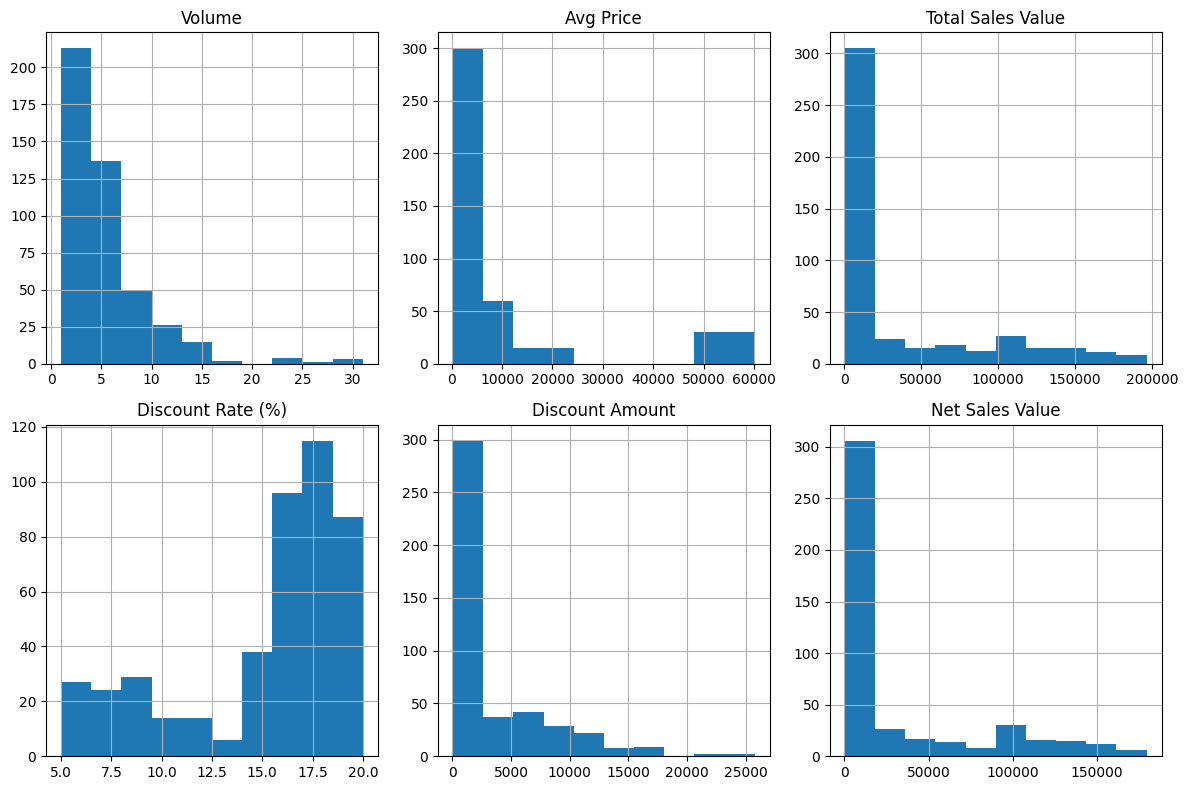

In [12]:
#Histogram
plt.figure(figsize=(12,8))
for i, col in enumerate(numerical_cols,1):
    plt.subplot(2,3,i)
    df[col].hist()
    plt.title(col)
plt.tight_layout()
plt.show()

In [15]:
print("The dataset is right-skewed, meaning most sales are small, but a few high-value transactions exist. and Outliers exist in Volume, Discount Amount, and Net Sales Value.")

The dataset is right-skewed, meaning most sales are small, but a few high-value transactions exist. and Outliers exist in Volume, Discount Amount, and Net Sales Value.


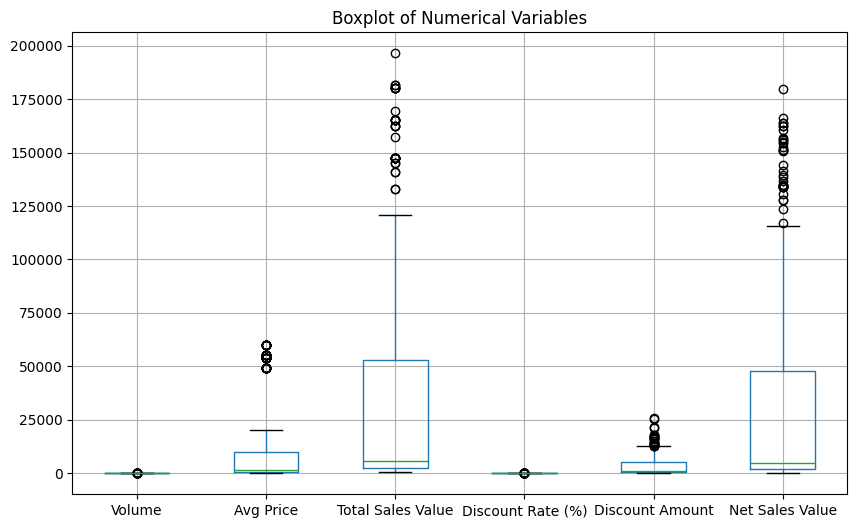

In [13]:
#2) BOXPLOT
#create boxplot for numerical variables
plt.figure(figsize=(10,6))
df[numerical_cols].boxplot()
plt.title('Boxplot of Numerical Variables')
plt.show()

In [16]:
#3) discuss findings  for extreme values or unusual distribution
for col in numerical_cols:
  q1=df[col].quantile(0.25)
  q3=df[col].quantile(0.75)
  iqr=q3-q1
  lower_bound=q1-(1.5*iqr)
  upper_bound=q3+(1.5*iqr)
  outliers=df[(df[col]<lower_bound)|(df[col]>upper_bound)]
  if not outliers.empty:
    print(f"column: {col} has outliers:{outliers.shape[0]}")
  else:
    print(f"column: {col} has no outliers")

column: Volume has outliers:44
column: Avg Price has outliers:60
column: Total Sales Value has outliers:36
column: Discount Rate (%) has outliers:45
column: Discount Amount has outliers:24
column: Net Sales Value has outliers:35


In [19]:
#)4) Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

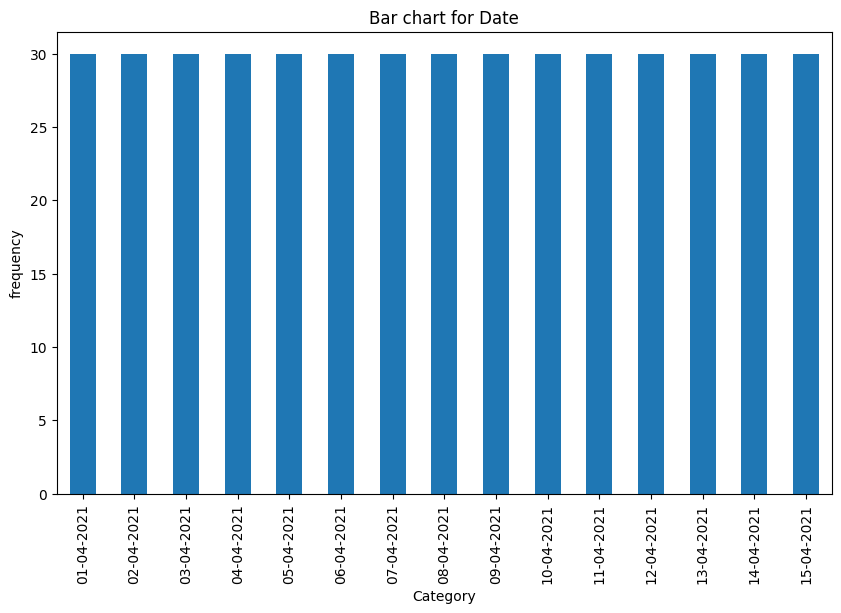

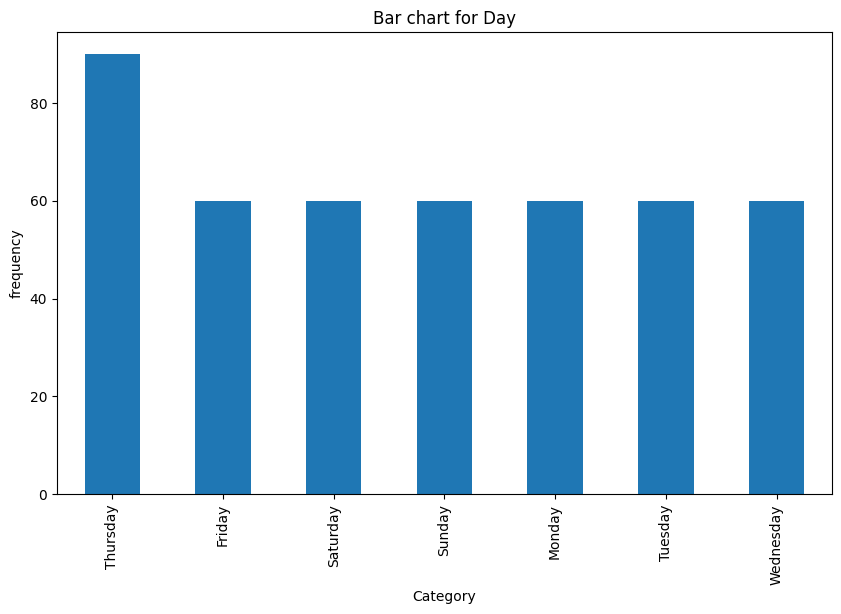

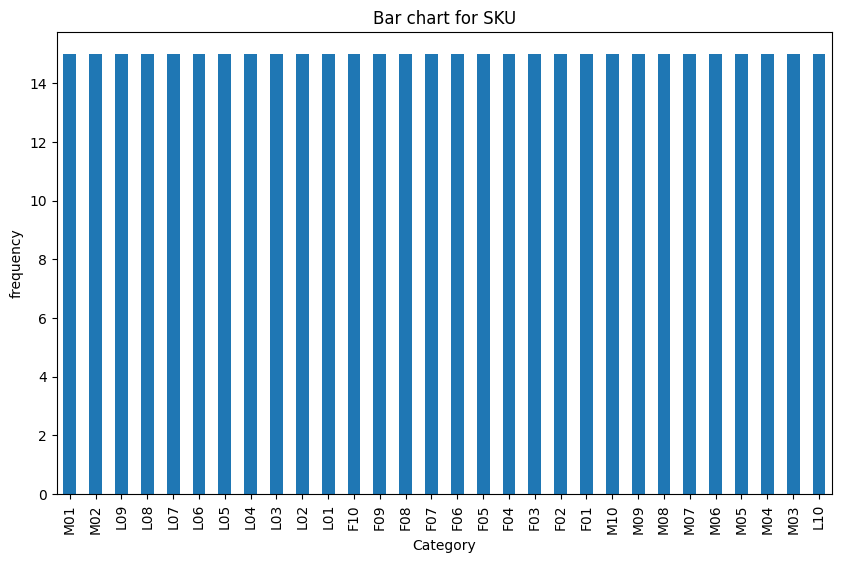

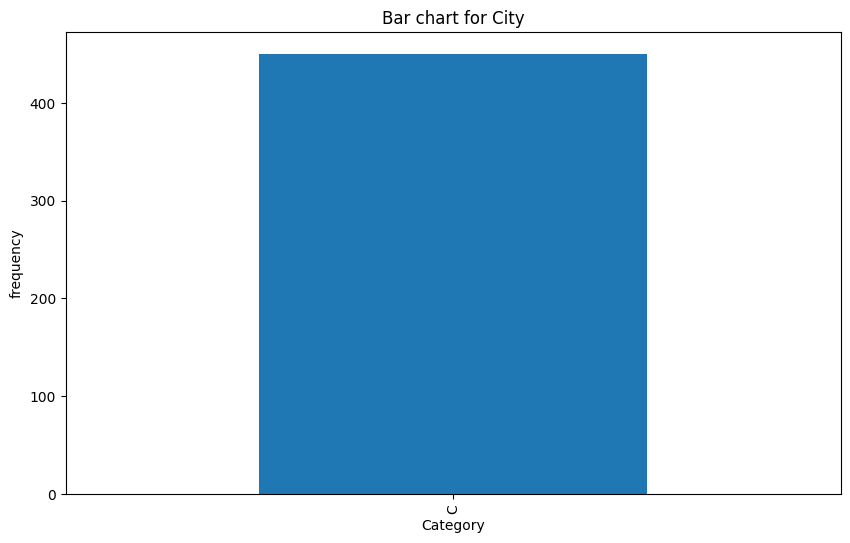

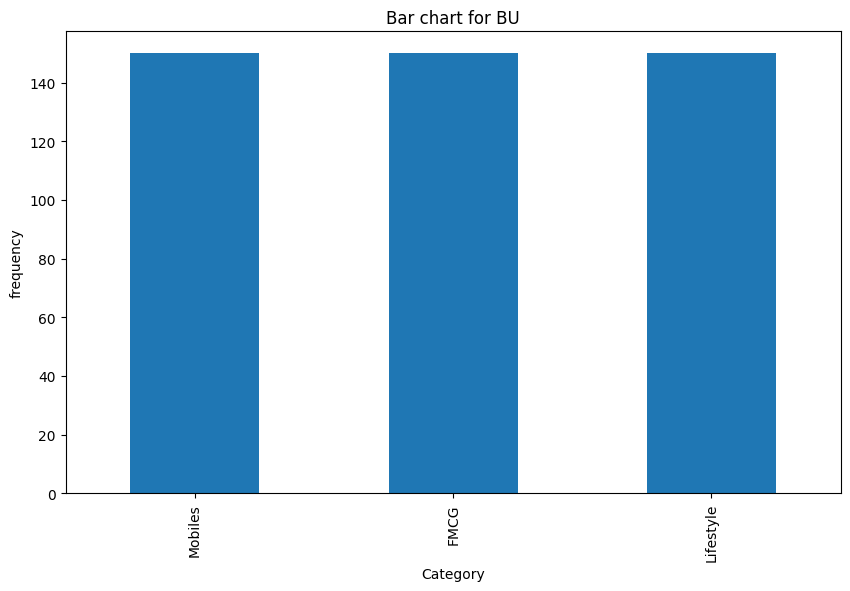

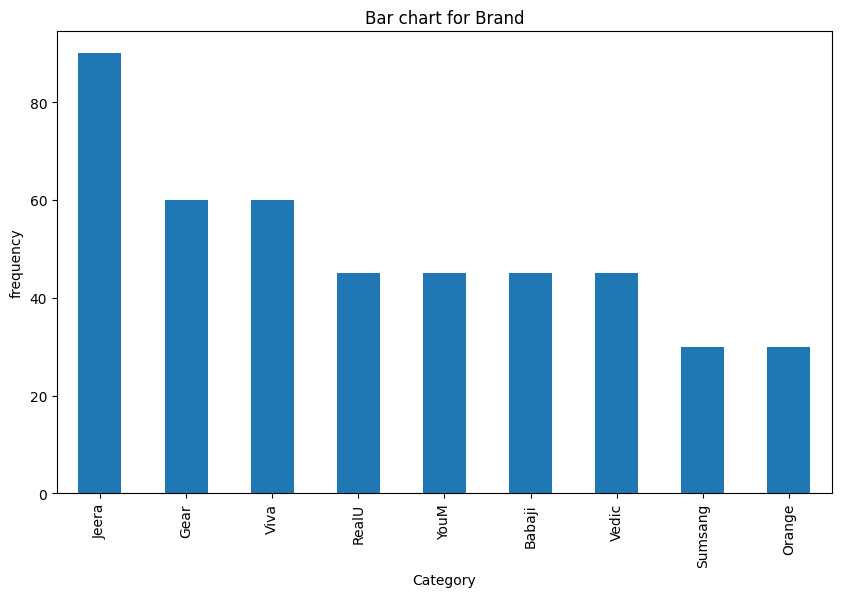

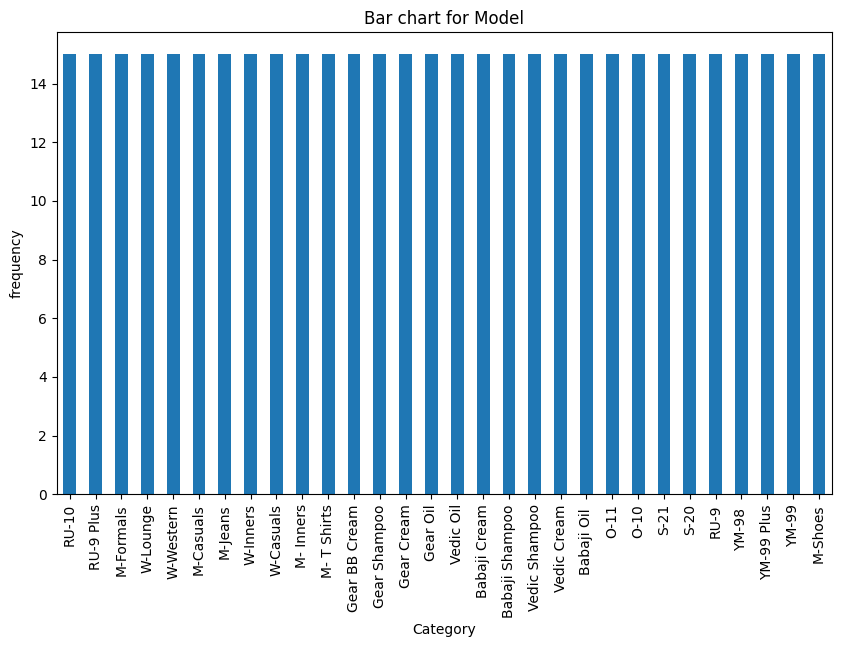

In [21]:
# Plot bar charts for categorical variables
for col in categorical_cols:
  plt.figure(figsize=(10,6))
  df[col].value_counts().plot(kind='bar')
  plt.title(f'Bar chart for {col}')
  plt.xlabel("Category")
  plt.ylabel("frequency")
  plt.show()


**Standardization of Numerical Variables**

In [25]:
#5) concept of standardization (z-score normalization).
print("Standardization is a technique used to scale data so that different numerical variables have a mean of 0 and a standard deviation of 1.")

Standardization is a technique used to scale data so that different numerical variables have a mean of 0 and a standard deviation of 1.


In [27]:
#6) standardize the numerical columns
df_standardized=df.copy()
for col in numerical_cols:
    mu=df[col].mean()
    sigma=df[col].std()
    df_standardized[col]=(df[col]-mu)/sigma

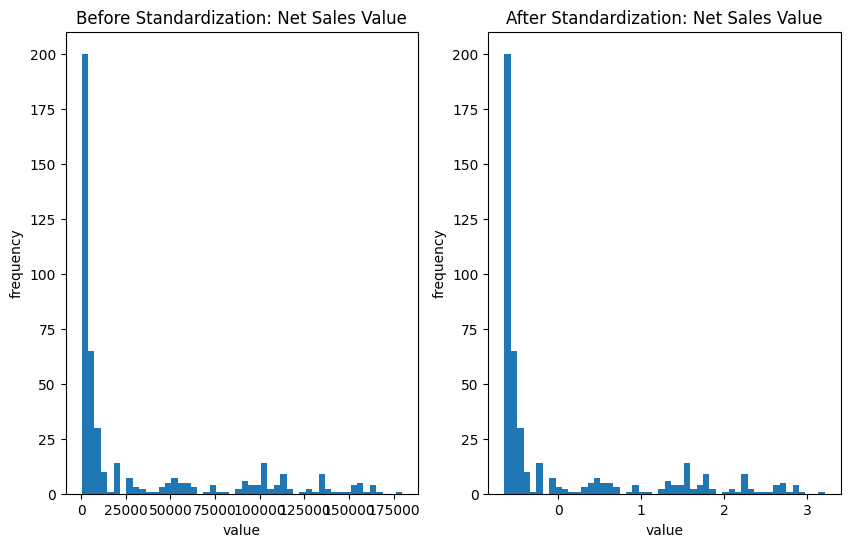

In [29]:
#7) Show before and after comparisons of the data distributions.
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
df[col].plot(kind='hist', bins=50)
plt.title(f'Before Standardization: {col}')
plt.xlabel("value")
plt.ylabel("frequency")
plt.subplot(1,2,2)
df_standardized[col].plot(kind='hist', bins=50)
plt.title(f'After Standardization: {col}')
plt.xlabel("value")
plt.ylabel("frequency")
plt.show()

**Conversion of Categorical Data into Dummy Variables**

In [ ]:
#8) Discussing the need for converting categorical data into dummy variables (one-hot encoding).
print("categorical variable cannot be directly used in machine learning algorithms.They need to be converted into a numerical format , such as dummy variables, to be used in ml models. one-hot encoding is a technique to convert categorical variables into binary columns,where each category is represent by 0 or 1.")

In [30]:
#9) Apply One-Hot Encoding (Dummy Variables)
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display transformed dataset
print("Transformed Dataset:\n", df_encoded.head())

Transformed Dataset:
    Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  Date_02-04-2021  Date_03-04-2021  Date_04-04-2021  \
0    160346.501180            False            False            False   
1     89323.897039            False            False            False   
2    102042.089843            False            False            False   
3    112235.925298            False            False            False   
4     19927.053770            False            False            False   

   Date_05-04-2021  ...  Model_Vedic Cream  Model_Vedic Oil  \
0

In [31]:
# Conclusion

In [36]:
print("1) The dataset is right-skewed, meaning most sales are small, but a few high-value transactions exist. and Outliers exist in Volume, Discount Amount, and Net Sales Value.")
print("2) Standardization helps normalize the data, reducing skewness and improving analysis.")
print("3) One-Hot Encoding successfully converts categorical data into a usable format.")


1) The dataset is right-skewed, meaning most sales are small, but a few high-value transactions exist. and Outliers exist in Volume, Discount Amount, and Net Sales Value.
2) Standardization helps normalize the data, reducing skewness and improving analysis.
3) One-Hot Encoding successfully converts categorical data into a usable format.
